# Life expectancy and GDP

*Author: Miguel García Camacho, https://github.com/mgcamacho/*

In this project we will look at how the GDP and life expectancy of six countries have changed over the course of two decades (2000-2015), and if there's any relationship between the variables. The hypothesis is that the countries with a higher GDP have a greater life expectancy, and viceversa. I intend to answer the following questions:
- How are GDP and life expectancy distributed for these countries in that latest year of the data?
- What changes have taken place in GDP and life expectancy through the years?
- Is there any correlation between GDP and life expectancy?

### Goals
The project is centered around getting data visualizations that show the evolution and relationship between life expectancy and GDP. Some of the visualizations intended are:
- A box plot that shows the GDP distribution and the life expectancy for the six countries
- A line chart that show the evolution of GDP and life expectancy throughout the years
- A scatter plot that displays the relation between GDP and life expectancy.

The goal is to demonstrate how GDP and life expectancy can be relevant indicators to understand the country development and welfare, and if there exists a trend.

## Import libraries and documents

Data is imported to manipulate and analyze it. Descriptive statistics are shown at a glance to get a general idea of the data.

In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = pd.read_csv('all_data.csv')
data.columns = ['country', 'year', 'life_expectancy', 'gdp']
data.describe()

,year,life_expectancy,gdp
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


## Data tidying
Duplicated and null values are eliminated. We also convert the variables to appropriate types and filter the data.

In [2]:
data = data.dropna() 
data['life_expectancy'] = data['life_expectancy'].astype(float)
data['gdp'] = data['gdp'].astype(float)

countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']
data = data[data['country'].isin(countries)]
data.country = data['country'].replace('United States of America', 'US')

## Data visualization
With clean data, we can start to explore the data with plots and charts.

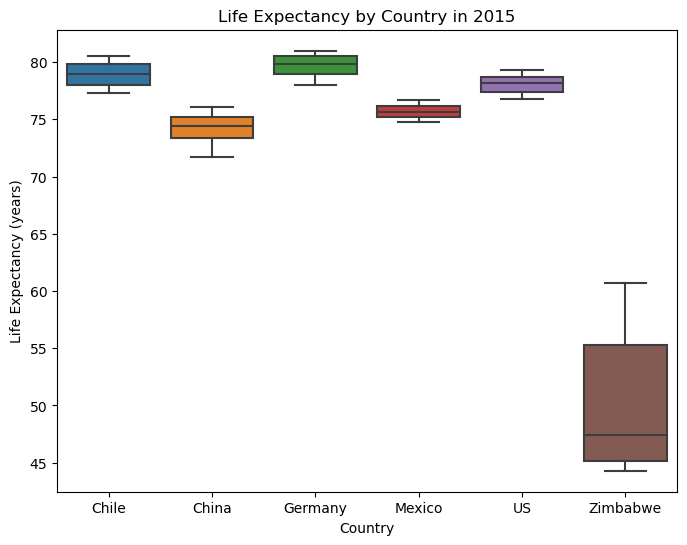

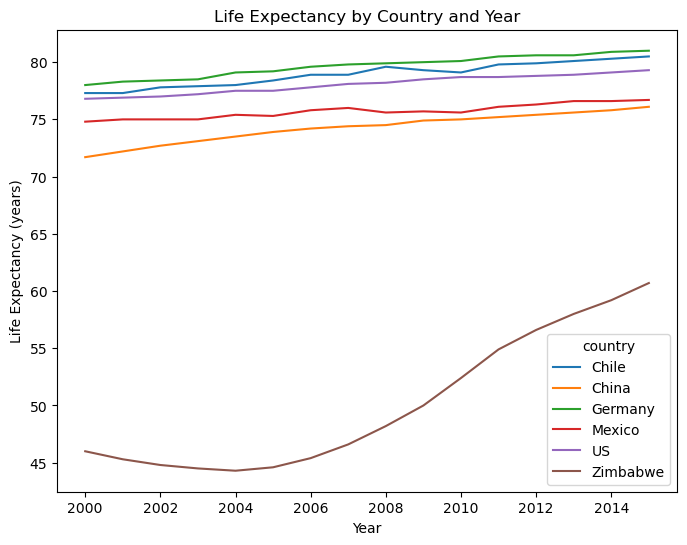

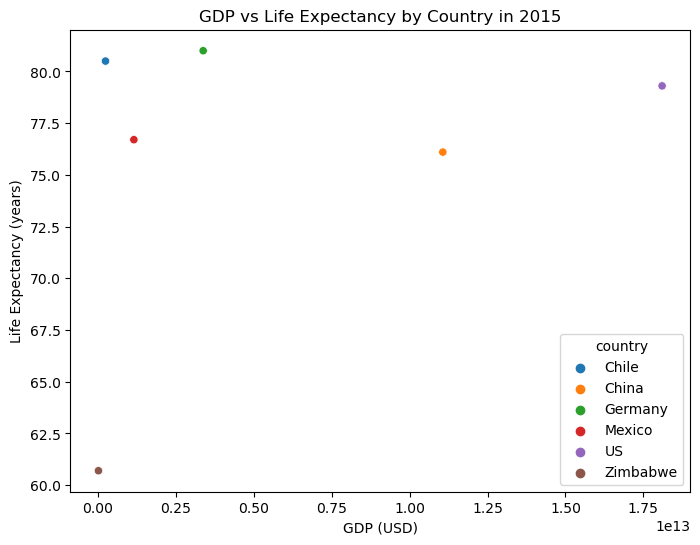

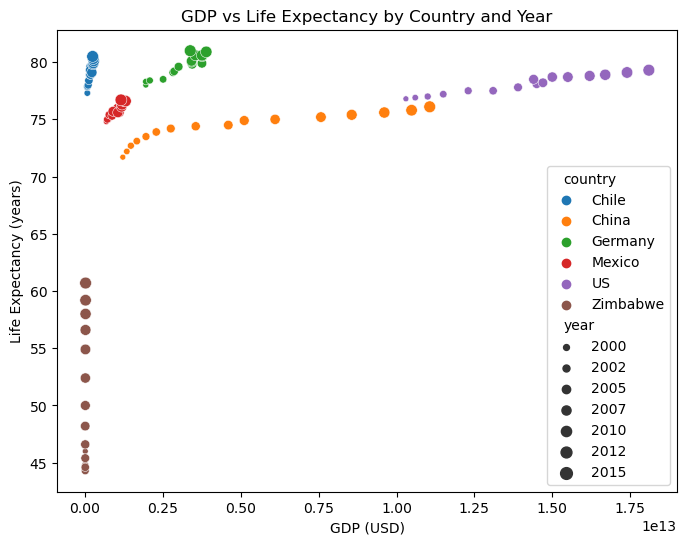

In [3]:
plt.figure(figsize=(8, 6))
ax = plt.subplot()
sns.boxplot(x='country', y='life_expectancy', data=data)
plt.title('Life Expectancy by Country in 2015')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.show()

plt.figure(figsize=(8, 6)) 
sns.lineplot(x='year', y='life_expectancy', hue='country', data=data)
plt.title('Life Expectancy by Country and Year')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='gdp', y='life_expectancy', hue='country', data=data[data['year']==2015]) 
plt.title('GDP vs Life Expectancy by Country in 2015')
plt.xlabel('GDP (USD)')
plt.ylabel('Life Expectancy (years)')
plt.show()

plt.figure(figsize=(8, 6)) 
sns.scatterplot(x='gdp', y='life_expectancy', hue='country', size='year', data=data)
plt.title('GDP vs Life Expectancy by Country and Year')
plt.xlabel('GDP (USD)')
plt.ylabel('Life Expectancy (years)')
plt.show()

## Data Analysis
Data analysis is performed to measure and model the relationship between GDP and life expectancy. Methods used:
- Correlation: To measure the degree of linear association between GDP and life expectancy.
- Linear Regression: To fit a model that explains the relationship between GDP and life expectancy, and obtain the coefficients, standard error, p-value, etc.

In [4]:
corr = np.corrcoef(data['gdp'], data['life_expectancy'])[0, 1]
print(f'The correlation between GDP and life expectancy is {corr:.2f}.')


X = sm.add_constant(data['gdp'])
y = data['life_expectancy']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

The correlation between GDP and life expectancy is 0.34.
                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     12.55
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           0.000619
Time:                        10:55:32   Log-Likelihood:                -357.00
No. Observations:                  96   AIC:                             718.0
Df Residuals:                      94   BIC:                             723.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Results and Conclusions

- The distribution of life expectancy by country in 2015 varies widely, from 60.7 years in Zimbabwe to 81 years in Germany. The box plot below shows the median, quartiles and outliers of life expectancy for each country.
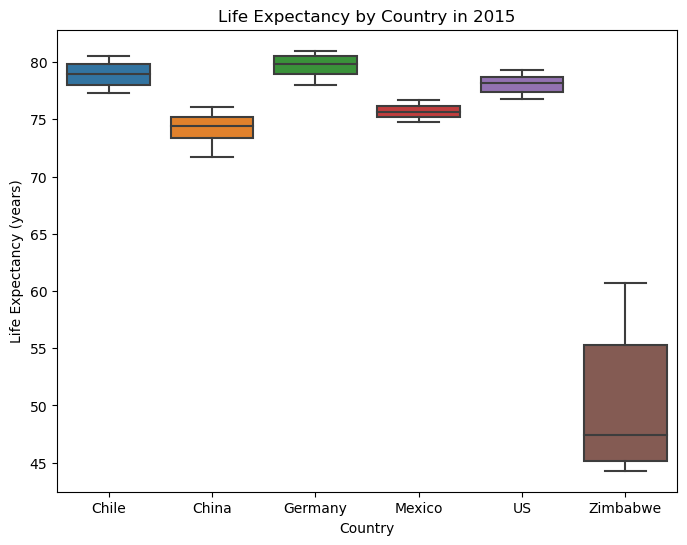

- The evolution of life expectancy by country and year shows that all countries have increased their life expectancy from the year 2000 to 2015, but at different rates. Zimbabwe has the highest growth rate, from 46 years in 2000, 60.7 in 2015, while Mexico has the lowest growth rate, from 74.8 years in 2000 to 76.7 in 2015. The line plot below shows the change of life expectancy over time for each country.
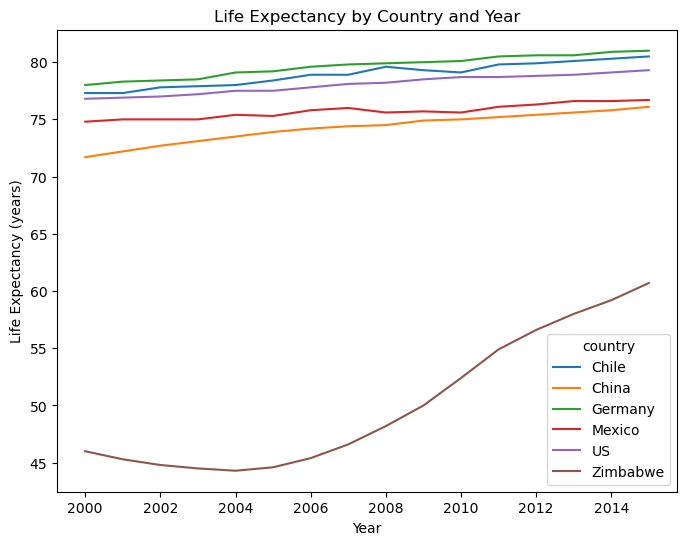

- The relationship between GDP and life expectancy by country in 2015 and over time shows that there is a positive correlation between these two variables, meaning that countries with higher GDP tend to have higher life expectancy, and vice versa. Nonetheless, the correlation is not very strong, and there are some outliers. The scatter plot below shows the relationship between GDP and life expectancy for each country in 2015.
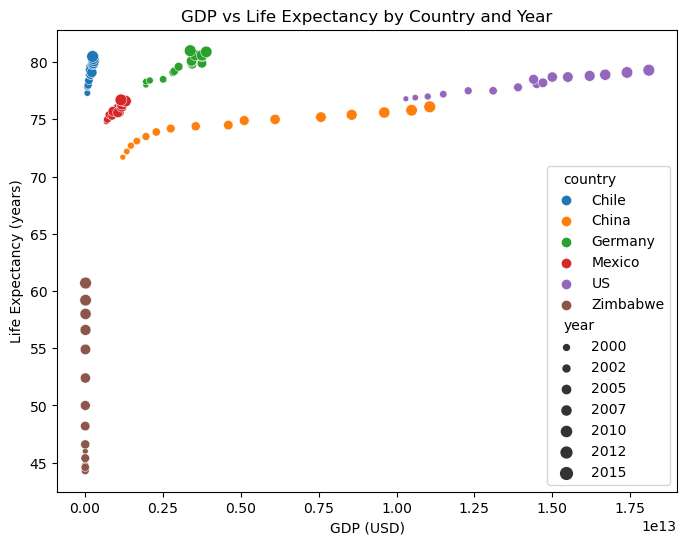

- The linear regression model between GDP and life expectancy showed a positive but small effect on life expectancy. For every increase of one billion (USD) in GDP, the life expectancy increased by 0.0007 years. However, only explained 11.8% of the variation in life expectancy can be explained by GDP. It seems there are other factors that affect life expectancy.

Some thoughts:
- There is a positive trend between GDP and life expectancy, but it's not very strong or consistent accross countries.
- There could be other factors that influence life expectancy, such as health care, education, etc.
- There is a wide gap between developed and developing countries in terms of GDP and life expectancy, which reflects inequality.